# MODUL 6 : Edge Detection

Untuk melakukan Pendeteksian Tepi membutuhkan beberapa library yang nantinya digunakan untuk mengolah suatu citra, library diantaranya adalah:
1. Library matplotlib.pyplot yang dinamakan sebagai "plt" merupakan library yang digunakan untuk memvisualisasikan suatu data
2. Library numpy yang dinamakan sebagai "np" merupakan library yang digunakan untuk melakukan proses matematika dalam suatu array
3. Library Opencv atau cv2 yang dinamakan sebagai "cv" merupakan library yang digunakan untuk mengolah suatu citra

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Hal pertama yang dilakukan untuk pendeteksian tepi yaitu menyimpan sebuah citra yang akan dideteksi tepinya kedalam suatu variabel yang dalam kasus ini variabel "image", kemudian mengubah dimensi dari citra yang awalnya BGR(Blue Green Red) menjadi dimensi Grayscale guna mempermudah pemrosesan dalam suatu citra, lalu citra yang berdimensi grayscale disimpan kedalam variabel "gray_image" lalu ditampilkan dengan fungsi imshow pada plt

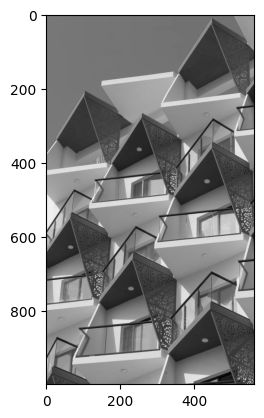

In [11]:
image = plt.imread("modul6.jpg")
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

FUNGSI padding : digunakan untuk menciptakan suatu citra baru yang telah di zero padding sesuai dengan kernel yang dibutuhkan, oleh karena itu fungsi ini membutuhkan parameter img untuk citranya dan kernel untuk ukuran paddingnya, padding dilakukan berdasarkan ukuran kernel, jika kernel berukuran ganjil maka jumlah padding yang didapatkan berasal dari panjang kernel yang dikurangi 1 lalu dibagi 2 sedangkan untuk kernel genap didapatkan dari ukuran kernel yang dibagi 2.

In [12]:
def padding (img, kernel):
    if len(kernel)%2 == 0:
        n = int(len(kernel)/2)
        result = np.pad (img, ([0,n],[0,n]))
    else:
        n = int((len(kernel)-1)/2)
        result = np.pad (img, ([n,n],[n,n]))
    return result

FUNGSI konvolusi : merupakan fungsi untuk melakukan konvolusi pada citra yang telah dipadding lalu menyimpannya kembali pada variabel yang berukuran sama dengan citra aslinya yang dalam kasus ini adalah variabel "result", adapun proses konvolusi citra menyesuaikan dengan ukuran kernel. sehingga dibutuhkan 3 parameter dalam fungsi ini yaitu parameter pad yaitu sebuah citra yang telah dipadding yang nantinya akan diambil nilai nilainya untuk dilakukan konvolusi, parameter img yang digunakan untuk mengambil ukuran citra asli untuk ditempatkan pada variabel result dan parameter kernel untuk membantu proses konvolusi yang di mana dilakukan proses sum of product pada piksel yang ingin di konvolusi serta piksel tetangganya dengan kernel yang ada pada parameter.

In [13]:
def konvolusi(pad, img, kernel):
    result = np.zeros(img.shape).astype(int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    result[i,j] += pad[i+k,j+l] * kernel[k][l]
    return result

FUNGSI Edge_Detection : merupakan fungsi yang digunakan untuk melakukan pendeteksian tepi, pada fungsi ini akan mengembalikan 3 nilai yaitu hasil pendeteksian tepi, pendeteksian tepi pada gradient X dan pendeteksian tepi pada gradient Y.

hal pertama yang dilakukan untuk pendeteksian adalah melakukan konvolusi citra dengan kernel yang berupa operator pendeteksian tepi pada kasus ini terdapat 2  kernel (untuk gradient X dan gradient Y) pada setiap metode sehingga dilakukan 2 konvolusi pada masing masing operator lalu hasil dari kedua konvolusi tersebut dipangkatkan dan diakarkan dengan bantuan np.sqrt, jika ingin mendapatkan hasil pendeteksian tepi yang lengkap kedua hasil konvolusi tadi ditambahkan setelah dipangkatkan.

In [14]:
def Edge_Detection(image,kernel1,kernel2):
    pad_image = padding(image,kernel1)

    konv1 = konvolusi(pad_image,image,kernel1)
    konv2 = konvolusi(pad_image,image,kernel2)

    square1 = konv1 * konv1
    square2 = konv2 * konv2

    Gradient_Y = np.zeros(square1.shape).astype(int)
    Gradient_Y = np.sqrt(square1)
    
    Gradient_X = np.zeros(square2.shape).astype(int)
    Gradient_X = np.sqrt(square2)

    hasil_jumlah = square1 + square2
    result = np.sqrt(hasil_jumlah)


    return result, Gradient_X, Gradient_Y

    
    

Untuk melakukan pendeteksian Tepi dibutuhkan operator pendeteksian tepi berupa kernel adapun bentuk kernel dari masing masing metode/operatornya diantaranya :

#### A. Kernel Sobel

In [15]:
Sx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
Sy = [[ 1, 2, 1],
      [ 0, 0, 0],
      [-1,-2,-1]]


#### B. Kernel Prewitt

In [ ]:
Px = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]
Py = [[ 1, 1, 1],
      [ 0, 0, 0],
      [-1,-1,-1]]

#### C. Kernel Roberts

In [ ]:
Rp = [[ 1, 0],
      [ 0,-1]]
Rm = [[ 0, 1],
      [-1, 0]]

## Nomor 1 : Lakukanlah deteksi tepi dengan menggunakan metode Sobel, Prewitt dan Roberts

### A. Metode Sobel

Melakukan pendeteksian tepi dengan memanggil fungsi Edge_Detection dengan paramaternya berupa citra yang telah digrayscale pada variabel "gray_image" serta 2 kernel yang merupakan operator dalam pendeteksian tepi, yang dalam kasus ini menggunakan kernel yang ada pada metode sobel yaitu yang ada pada variabel "Sx" dan "Sy", kemudian akan didapatkan 3 hasil citra, yaitu citra hasil pendeteksian tepi, citra hasil pendeteksian tepi pada gradient X dan citra hasil pendeteksian tepi pada gradient Y, lalu ditampilkan dengan fungsi imshow yang ada pada library plt.


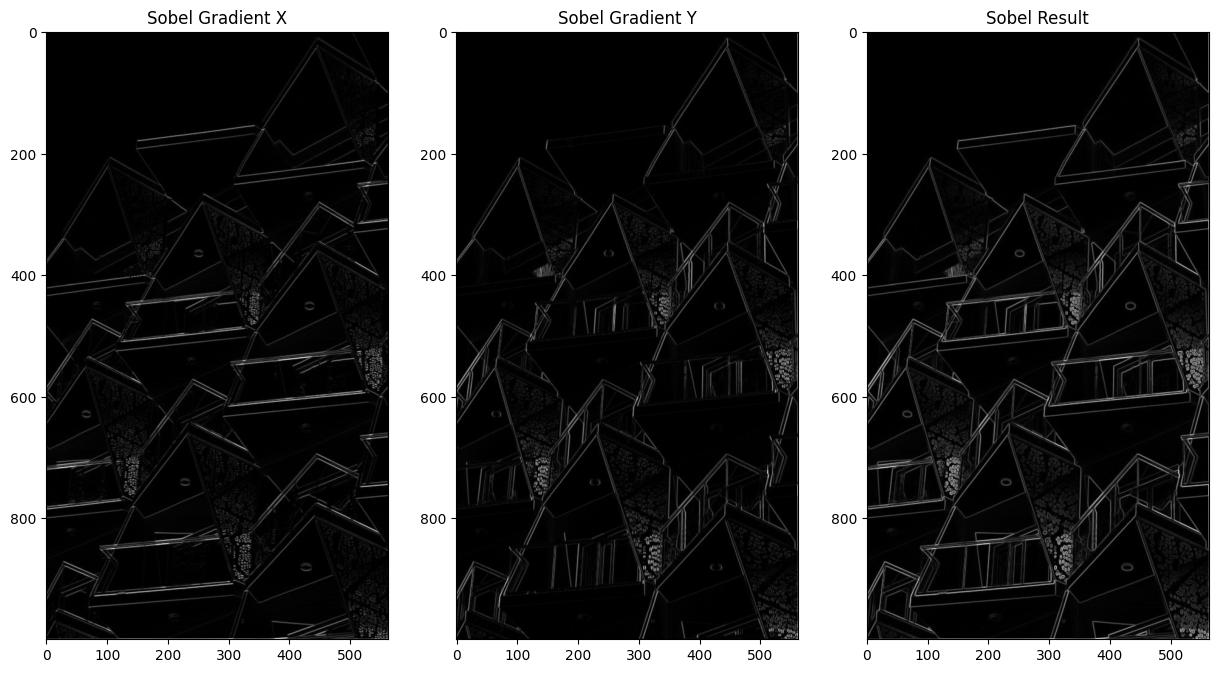

In [16]:
sobel_img, sobel_imgX, sobel_imgY = Edge_Detection(gray_image, Sx, Sy)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("Sobel Gradient X")
plt.imshow(sobel_imgX, cmap='gray')
plt.subplot(1,3,2)
plt.title("Sobel Gradient Y")
plt.imshow(sobel_imgY, cmap='gray')
plt.subplot(1,3,3)
plt.title("Sobel Result")
plt.imshow(sobel_img, cmap='gray')


### B. Metode Prewitt

Melakukan pendeteksian tepi dengan memanggil fungsi Edge_Detection dengan paramaternya berupa citra yang telah digrayscale pada variabel "gray_image" serta 2 kernel yang merupakan operator dalam pendeteksian tepi, yang dalam kasus ini menggunakan kernel yang ada pada metode prewitt yaitu yang ada pada variabel "Px" dan "Py", kemudian akan didapatkan 3 hasil citra, yaitu citra hasil pendeteksian tepi, citra hasil pendeteksian tepi pada gradient X dan citra hasil pendeteksian tepi pada gradient Y, lalu ditampilkan dengan fungsi imshow yang ada pada library plt.

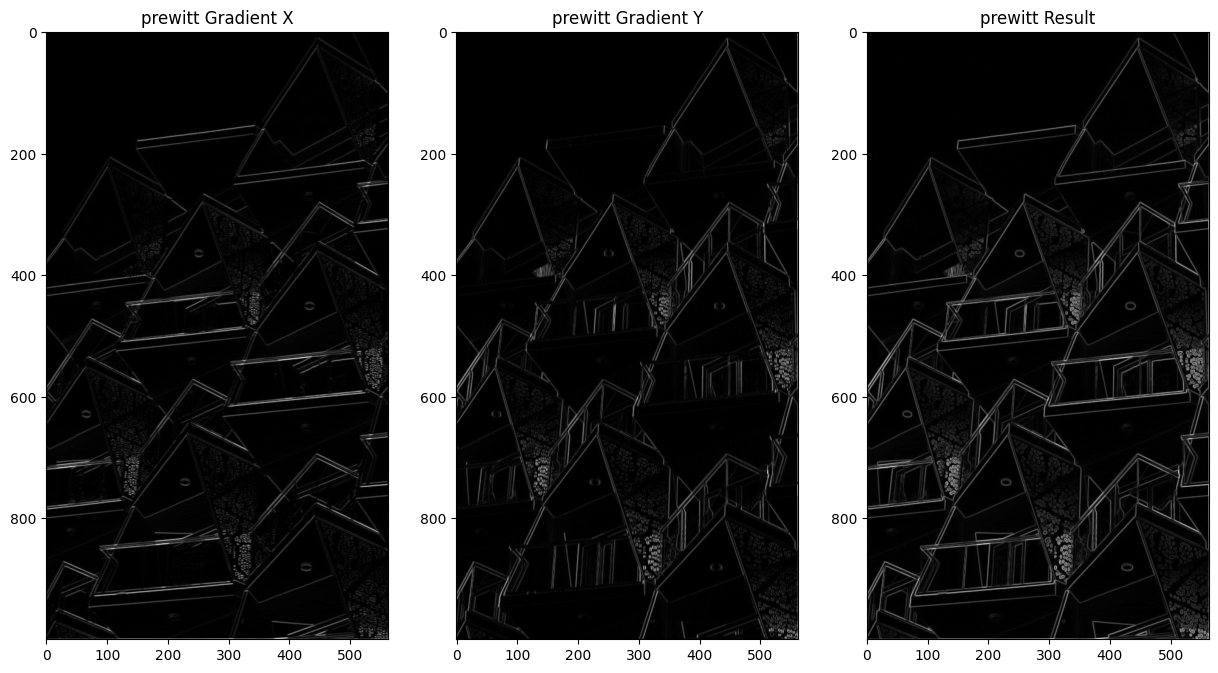

In [17]:
prewitt_img, prewitt_imgX, prewitt_imgY = Edge_Detection(gray_image, Px, Py)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("prewitt Gradient X")
plt.imshow(prewitt_imgX, cmap='gray')
plt.subplot(1,3,2)
plt.title("prewitt Gradient Y")
plt.imshow(prewitt_imgY, cmap='gray')
plt.subplot(1,3,3)
plt.title("prewitt Result")
plt.imshow(prewitt_img, cmap='gray')

### C. Metode Roberts

Melakukan pendeteksian tepi dengan memanggil fungsi Edge_Detection dengan paramaternya berupa citra yang telah digrayscale pada variabel "gray_image" serta 2 kernel yang merupakan operator dalam pendeteksian tepi, yang dalam kasus ini menggunakan kernel yang ada pada metode roberts yaitu yang ada pada variabel "Rp" dan "Rm", kemudian akan didapatkan 3 hasil citra, yaitu citra hasil pendeteksian tepi, citra hasil pendeteksian tepi pada gradient X dan citra hasil pendeteksian tepi pada gradient Y, lalu ditampilkan dengan fungsi imshow yang ada pada library plt.

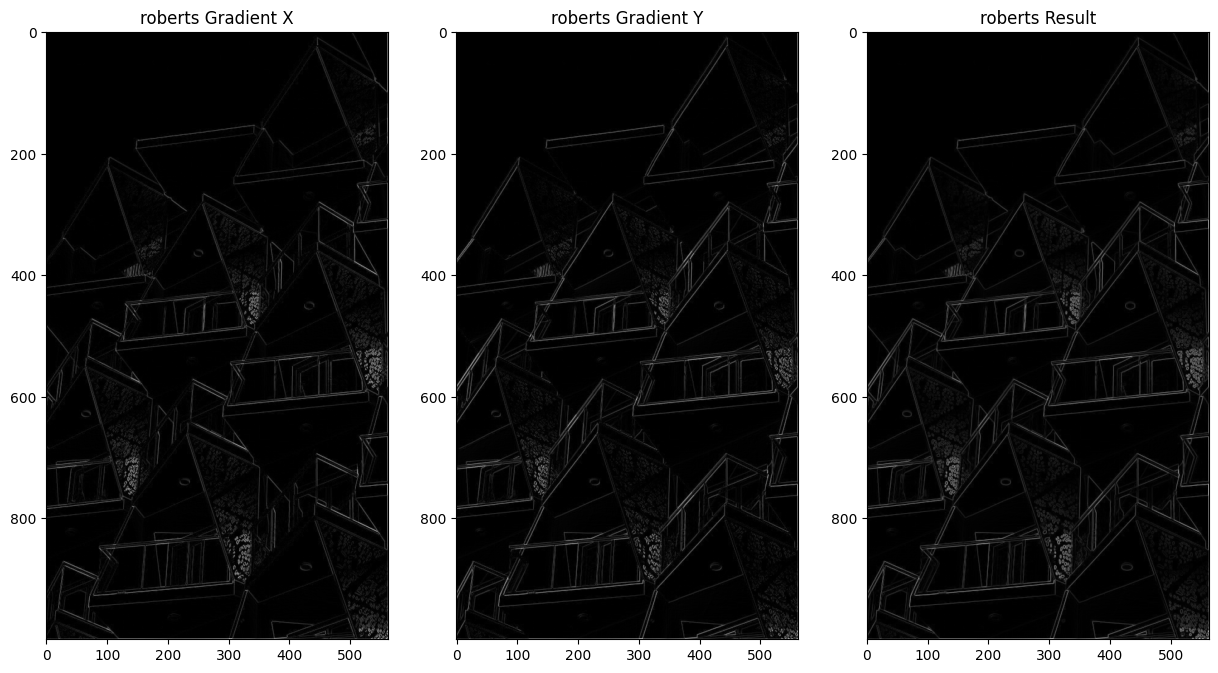

In [18]:
roberts_img, roberts_imgX, roberts_imgY = Edge_Detection(gray_image, Rp, Rm)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("roberts Gradient X")
plt.imshow(roberts_imgX, cmap='gray')
plt.subplot(1,3,2)
plt.title("roberts Gradient Y")
plt.imshow(roberts_imgY, cmap='gray')
plt.subplot(1,3,3)
plt.title("roberts Result")
plt.imshow(roberts_img, cmap='gray')

### Menampilkan Ketiga Hasil Pendeteksian Tepi dari 3 Metode : Sobel, Prewitt dan Roberts

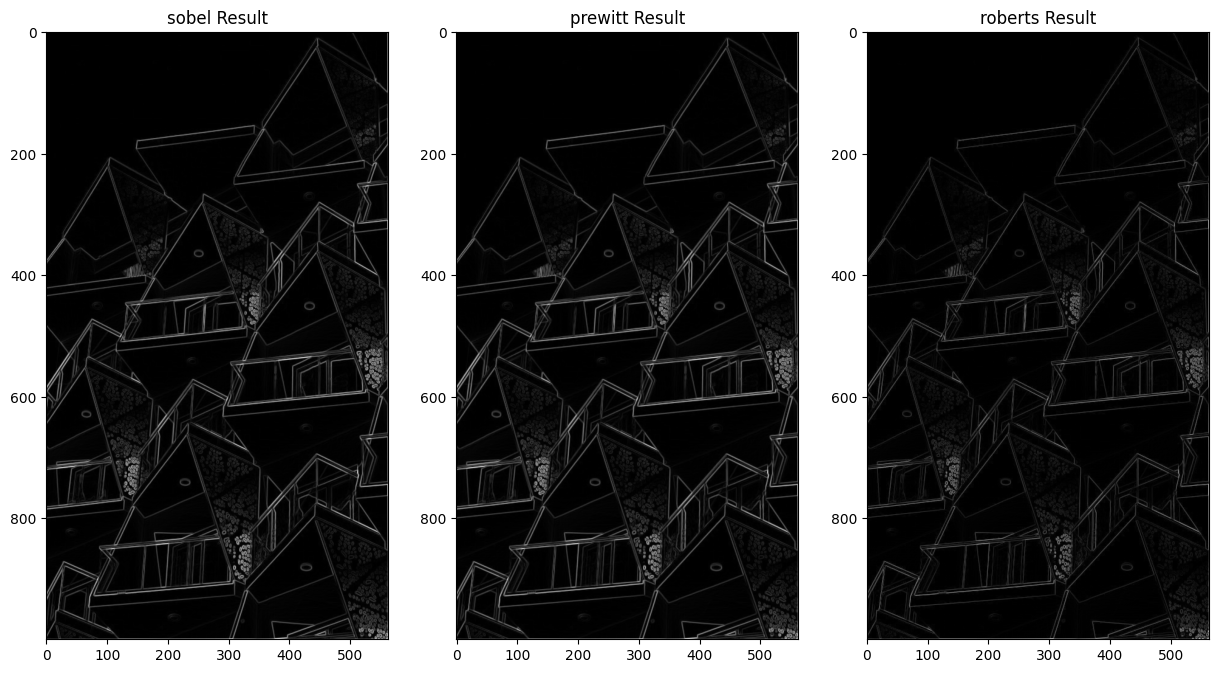

In [19]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("sobel Result")
plt.imshow(sobel_img, cmap='gray')
plt.subplot(1,3,2)
plt.title("prewitt Result")
plt.imshow(prewitt_img, cmap='gray')
plt.subplot(1,3,3)
plt.title("roberts Result")
plt.imshow(roberts_img, cmap='gray')

## Nomor 2 : Buatlah method untuk mencari hasil terbaik dari ketiga metode no 1 dengan cara melihat jumlah warna yang diperoleh dari hasil deteksi tepi

FUNGSI FindBestEdge : merupakan fungsi yang digunakan untuk mencari hasil pendeteksian tepi yang terbaik dari tiga hasil metode pendeteksian tepi (sobel, prewitt dan roberts) dengan cara menghitung jumlah piksel bernilai 0 pada masing masing citra, yang memiliki jumlah tersedikit yang menjadi metode terbaik.

In [20]:
def FindBestEdge(img_A, img_B, img_C):
    A = 0 
    B = 0
    C = 0
    result = np.zeros(img_A.shape).astype(int)
    for i in range(img_A.shape[0]):
        for j in range(img_A.shape[1]):
            if img_A[i,j] == 0:
                A += 1
            if img_B[i,j] == 0:
                B += 1
            if img_C[i,j] == 0:
                C += 1
    if A < B:
        if A < C:
            result = img_A
        else:
            result = img_C
    else:
        if B < C:
            result = img_B
        else:
            result = img_C
    return result


Melakukan pencarian hasil pendeteksian terbaik dengan memanggil fungsi FindBestEdge dengan parameternya merupakan tiga hasil metode pendeteksian tepi (sobel, prewitt dan roberts) sehingga didapatkan bahwa metode dengan pendeteksian tepi terbaik adalah metode sobel.

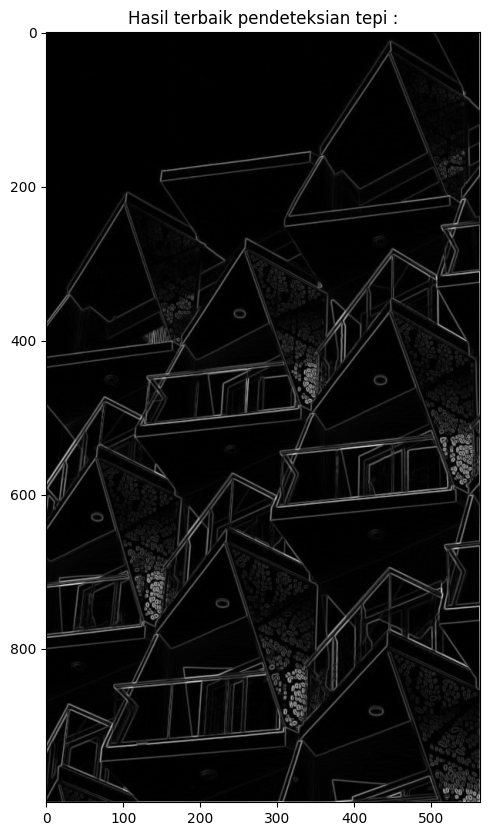

In [21]:
Best_edge = FindBestEdge(sobel_img, prewitt_img, roberts_img)
plt.figure(figsize=(10,10))
plt.title("Hasil terbaik pendeteksian tepi :")
plt.imshow(Best_edge, cmap='gray')
